## Question 1

In [580]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import math

img = cv2.imread("original_imgs/noise.jpg",0)

mask = np.zeros([5,3])
mask[:,:] = 255
mask.size
print(mask)

[[255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]]


In [581]:
def dilation(img,mask):
    new_img = np.zeros(img.shape)
    
    h= len(mask)//2
    w= len(mask[0])//2
    
    for i in range(h,len(img)-h):
        for j in range(w,len(img[0])-w):
            val_region = img[i - h: i + h + 1, j - w: j + w + 1]
            val = 0
            for k in range(len(mask)):
                for l in range(len(mask[0])):
                    if(val_region[k,l] == mask[k,l]):
                        val += 1
            if(val != 0):
                new_img[i][j] = 255
    return new_img

def erosion(img,mask):
    new_img = np.zeros(img.shape)
    
    h= len(mask)//2
    w= len(mask[0])//2
    
    for i in range(h,len(img)-h):
        for j in range(w,len(img[0])-w):
            val_region = img[i - h: i + h + 1, j - w: j + w + 1]
            val = 0
            for k in range(len(mask)):
                for l in range(len(mask[0])):
                    if(val_region[k,l] == mask[k,l]):
                        val += 1                       
            if(val == mask.size):
                new_img[i][j] = 255
    return new_img

In [582]:
img_1=erosion(dilation(dilation(erosion(img,mask),mask),mask),mask)
img_2=dilation(erosion(erosion(dilation(img,mask),mask),mask),mask)  
cv2.imwrite('res_noise1.jpg',img_1) #opening followed by closing
cv2.imwrite('res_noise2.jpg',img_2) #closing followed by opening

True

In [583]:
img_3=dilation(img_1,mask)
img_bound_1=img_3-img_1 #Image boundary using dilation
cv2.imwrite('res_bound1.jpg',img_bound_1)

True

In [584]:
img_4=erosion(img_2,mask)
img_bound_2=img_2-img_4 #Image boundary using erosion
cv2.imwrite('res_bound2.jpg',img_bound_2)

True

## Question-2

In [585]:
import numpy as np
import cv2

img1 = cv2.imread('original_imgs/turbine-blade.jpg')

gray_scale = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [667]:
kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], dtype = np.int8)

image_h, image_w = gray_scale.shape

kernel_h, kernel_w=kernel.shape

new_img = np.zeros(gray_scale.shape) 

image_padded = np.zeros((gray_scale.shape[0] + 2, gray_scale.shape[1] + 2))   
image_padded[1:-1, 1:-1] = gray_scale

img_1 = gray_scale.copy() 

for i in range(image_h):
    for j in range(image_w):
        val=np.sum(kernel*image_padded[i:i+3,j:j+3])        

        if val>600:
            new_img[i,j]=255
        else:
            new_img[i,j]=0
            
cv2.imwrite('point_threshold.jpg',new_img)

True

In [668]:
largest_num = new_img[0][0]
for row_idx, row in enumerate(new_img):
    for col_idx, num in enumerate(row):
        if num > largest_num:
            largest_num = num
            id_x=col_idx
            id_y=row_idx

large_val = largest_num
id_f_x=id_x
id_f_y=id_y
print(id_f_x,id_f_y)

445 249


In [669]:
cv2.circle(img1,(id_f_x,id_f_y), 10, (0,0,255), 2)
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img1, "[445,249]", (410,230), font, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
cv2.imwrite('porous_img.jpg',img1)

True

## 2B

In [660]:
from matplotlib import pyplot as plt

img_segment = cv2.imread('original_imgs/segment.jpg')

segment = cv2.cvtColor(img_segment, cv2.COLOR_BGR2GRAY)
print(len(segment))
print(len(segment[0]))

321
712


In [661]:
arr = []

for i in range(len(segment)):
    for j in range (len(segment[0])):
        if segment[i][j]!=0:
            arr.append(segment[i][j]) 
            
count_arr=np.zeros([256,1])

for i in range(0,len(arr)):
    count_arr[arr[i]]=count_arr[arr[i]]+1

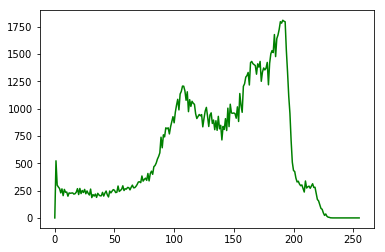

In [662]:
plt.plot(count_arr,color='green')
plt.show()

In [663]:
new_img=np.zeros(segment.shape)

for i in range(len(segment)):
    for j in range (len(segment[0])):
        if segment[i][j]<200:
            new_img[i][j]=0
        else:
            new_img[i][j]=255

In [664]:
cv2.imwrite('threshold-image.jpg',new_img)

True

In [665]:
i, j = np.where(new_img == 255)
print(i,j)

[ 22  24  24 ... 284 284 284] [344 341 352 ... 354 355 359]


In [666]:
cv2.rectangle(img_segment,(160,125),(210,168),(0,0,255),2)
cv2.rectangle(img_segment,(250,210),(305,76),(0,0,255),2)
cv2.rectangle(img_segment,(330,285),(363,20),(0,0,255),2)
cv2.rectangle(img_segment,(388,255),(425,38),(0,0,255),2)
cv2.imwrite('final_img.jpg',img_segment)

True

## Question-3

## 3A

In [609]:
import numpy as np
import cv2

In [610]:
def hough_lines_acc(img, theta_resolution=1):
    height, width = img.shape
    img_diagonal = np.ceil(np.sqrt(height*height + width*width))
    rhos = np.linspace(-img_diagonal, img_diagonal, img_diagonal*2)
    thetas = np.deg2rad(np.arange(-90, 90, theta_resolution))

    # create the empty Hough Accumulator with dimensions equal to the size of
    # rhos and thetas
    hough_acc = np.zeros((len(rhos), len(thetas)), dtype=np.uint8)
    y_id, x_id = np.nonzero(img) # find all edge (nonzero) pixel indexes

    for i in range(len(x_id)): # cycle through edge points
        x = x_id[i]
        y = y_id[i]

        for i in range(len(thetas)): 
            rho = int((x * np.cos(thetas[i]) + y * np.sin(thetas[i])) + img_diagonal)
            hough_acc[rho, i] += 1

    return hough_acc, rhos, thetas

In [611]:
def hough_peaks(hough_acc, num_peaks, nhood_size):
    # loop through number of peaks to identify
    indicies = []
    hough_acc_1 = np.copy(hough_acc)
    for i in range(num_peaks):
        idmax = np.argmax(hough_acc_1) 
        hough_acc_idmax = np.unravel_index(idmax, hough_acc_1.shape) 
        indicies.append(hough_acc_idmax)


        idmax_y, idmax_x = hough_acc_idmax 
        
        if (idmax_x - (nhood_size/2)) < 0:
            min_x = 0
        else: 
            min_x = idmax_x - (nhood_size/2)
            
        if ((idmax_x + (nhood_size/2) + 1) > hough_acc.shape[1]): 
            max_x = hough_acc.shape[1]
        else: 
            max_x = idmax_x + (nhood_size/2) + 1


        if (idmax_y - (nhood_size/2)) < 0: 
            min_y = 0
        else: 
            min_y = idmax_y - (nhood_size/2)
        if ((idmax_y + (nhood_size/2) + 1) > hough_acc.shape[0]): 
            max_y = hough_acc.shape[0]
        else: 
            max_y = idmax_y + (nhood_size/2) + 1

        for x in range(int(min_x), int(max_x)):
            for y in range(int(min_y), int(max_y)):
                
                hough_acc_1[y, x] = 0

                
                if (x == min_x or x == (max_x - 1)):
                    hough_acc[y, x] = 255
                if (y == min_y or y == (max_y - 1)):
                    hough_acc[y, x] = 255

    return indicies, hough_acc

In [612]:
def hough_lines_draw(img, indicies, rhos, thetas):
    for i in range(len(indicies)):
        rho = rhos[indicies[i][0]]
        theta = thetas[indicies[i][1]]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

In [615]:
# read in shapes image and convert to grayscale
coin_img = cv2.imread('original_imgs/hough.jpg')

img_b = coin_img.copy()

img_b[:, :, 1] = 0
img_b[:, :, 2] = 0

blur_img_b = cv2.GaussianBlur(img_b, (5, 5), 1.5)

coin_edges = cv2.Canny(blur_img_b, 100, 200)

In [617]:
# run hough_lines_accumulator on the shapes canny_edges image
hough_acc, rhos, thetas = hough_lines_acc(coin_edges)
indicies, hough_acc = hough_peaks(hough_acc, 6, 20) # find peaks
hough_lines_draw(coin_img, indicies, rhos, thetas)


cv2.imwrite('red_lines.jpg',coin_img)

C:\Users\disha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


True

## 3B

In [618]:
# read in shapes image and convert to grayscale
coin_img_b = cv2.imread('original_imgs/hough.jpg')

img_b = coin_img_b.copy()

img_b[:, :, 0] = 0
img_b[:, :, 1] = 0


blur_img_b = cv2.GaussianBlur(img_b, (5, 5), 0)

coin_edges_b = cv2.Canny(blur_img_b, 100, 200)

In [619]:
hough_acc, rhos, thetas = hough_lines_acc(coin_edges_b)
indicies, hough_acc = hough_peaks(hough_acc, 8, 40) # find peaks
hough_lines_draw(coin_img_b, indicies, rhos, thetas)

cv2.imwrite('blue_lines.jpg',coin_img_b)

C:\Users\disha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


True